In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


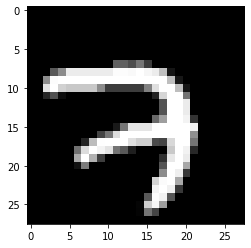

In [26]:
img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap='gray')

Tensor("Conv2D:0", shape=(1, 14, 14, 5), dtype=float32)
Tensor("MaxPool:0", shape=(1, 7, 7, 5), dtype=float32)


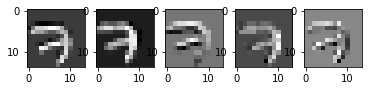

In [49]:
g1 = tf.Graph()
with g1.as_default() as graph:
    
    img = img.reshape(-1, 28, 28, 1)
    W1 = tf.Variable(tf.compat.v1.random_normal([3, 3, 1, 5], stddev=0.01))
    conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
    print(conv2d)
    pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    print(pool)
    
    init_op = tf.compat.v1.global_variables_initializer()

sess = tf.compat.v1.Session(graph = g1)
sess.run(init_op)

conv2d_img = conv2d.eval(session=sess)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14, 14), cmap='gray')
    

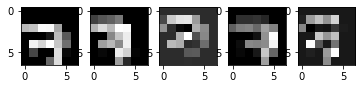

In [50]:
pool_img = pool.eval(session=sess)
pool_img = np.swapaxes(pool_img, 0, 3)

for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')